# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Importing Dataset

In [3]:
data = pd.read_csv('creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# EDA

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


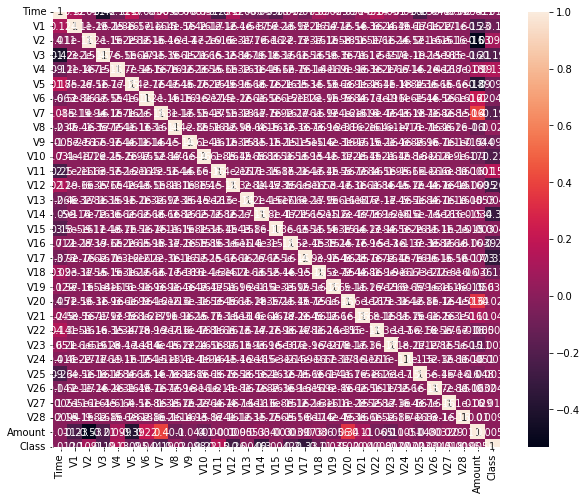

In [6]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [7]:
np.shape(data)

(284807, 31)

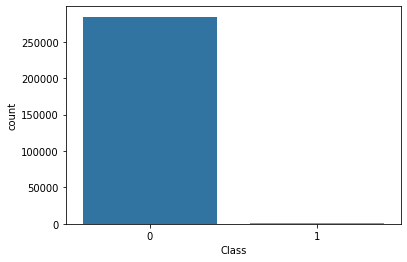

In [8]:
sns.countplot(x=data.Class)

In [9]:
data['Amount'].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: Amount, Length: 32767, dtype: int64

# FEature Selection

In [10]:
Y = data['Class']
X = data.drop('Class',1)

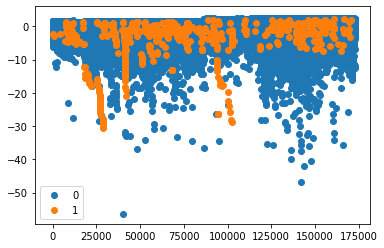

In [11]:
from collections import Counter
from matplotlib import pyplot
counter_y = Counter(Y)

for label, _ in counter_y.items():
	row_ix = np.where(Y == label)[0]
	pyplot.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model, step=10)
rfe = rfe.fit(X, Y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['V2', 'V4', 'V5', 'V7', 'V8', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V25']


In [13]:
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['V2', 'V4', 'V5', 'V7', 'V8', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V25']


In [14]:
Selected_features = ['V2', 'V4', 'V5', 'V7', 'V8', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V25']
X = data[Selected_features]

In [15]:
amount = data['Amount']

In [16]:
X["Amount"] = amount

In [17]:
X

,V2,V4,V5,V7,V8,V10,V13,V14,V15,V16,V17,V18,V21,V22,V25,Amount
0,-0.072781,1.378155,-0.338321,0.239599,0.098698,0.090794,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,-0.018307,0.277838,0.128539,149.62
1,0.266151,0.448154,0.060018,-0.078803,0.085102,-0.166974,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.225775,-0.638672,0.167170,2.69
2,-1.340163,0.379780,-0.503198,0.791461,0.247676,0.207643,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,0.247998,0.771679,-0.327642,378.66
3,-0.185226,-0.863291,-0.010309,0.237609,0.377436,-0.054952,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-0.108300,0.005274,0.647376,123.50
4,0.877737,0.403034,-0.407193,0.592941,-0.270533,0.753074,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,-0.009431,0.798278,-0.206010,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,10.071785,-2.066656,-5.364473,-4.918215,7.305334,4.356170,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,0.213454,0.111864,1.436807,0.77
284803,-0.055080,-0.738589,0.868229,0.024330,0.294869,-0.975926,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,0.214205,0.924384,-0.606624,24.79
284804,-0.301254,-0.557828,2.630515,-0.296827,0.708417,-0.484782,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,0.232045,0.578229,0.265745,67.88
284805,0.530483,0.689799,-0.377961,-0.686180,0.679145,-0.399126,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,0.265245,0.800049,-0.569159,10.00


In [18]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [19]:
X

,V2,V4,V5,V7,V8,V10,V13,V14,V15,V16,V17,V18,V21,V22,V25,Amount
0,-0.072781,1.378155,-0.338321,0.239599,0.098698,0.090794,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,-0.018307,0.277838,0.128539,149.62
1,0.266151,0.448154,0.060018,-0.078803,0.085102,-0.166974,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.225775,-0.638672,0.167170,2.69
2,-1.340163,0.379780,-0.503198,0.791461,0.247676,0.207643,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,0.247998,0.771679,-0.327642,378.66
3,-0.185226,-0.863291,-0.010309,0.237609,0.377436,-0.054952,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-0.108300,0.005274,0.647376,123.50
4,0.877737,0.403034,-0.407193,0.592941,-0.270533,0.753074,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,-0.009431,0.798278,-0.206010,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,10.071785,-2.066656,-5.364473,-4.918215,7.305334,4.356170,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,0.213454,0.111864,1.436807,0.77
284803,-0.055080,-0.738589,0.868229,0.024330,0.294869,-0.975926,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,0.214205,0.924384,-0.606624,24.79
284804,-0.301254,-0.557828,2.630515,-0.296827,0.708417,-0.484782,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,0.232045,0.578229,0.265745,67.88
284805,0.530483,0.689799,-0.377961,-0.686180,0.679145,-0.399126,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,0.265245,0.800049,-0.569159,10.00


In [20]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_recall_curve,roc_auc_score,precision_score,recall_score,f1_score

In [23]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logisitc Regression

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [25]:
y_pred = LR.predict(X_test)
a = accuracy_score(y_test, y_pred) * 100
p = precision_score(y_test,y_pred,average='macro') * 100 
r = recall_score(y_test,y_pred,average='macro') * 100
f = f1_score(y_test,y_pred,average='macro') * 100

In [26]:
evaluate(LR, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[213196     28]
 [   144    237]]
ACCURACY SCORE:
0.9992
CLASSIFICATION REPORT:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999325    0.894340  0.999195       0.946832       0.999138
recall          0.999869    0.622047  0.999195       0.810958       0.999195
f1-score        0.999597    0.733746  0.999195       0.866671       0.999123
support    213224.000000  381.000000  0.999195  213605.000000  213605.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[71081    10]
 [   46    65]]
ACCURACY SCORE:
0.9992
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999353    0.866667  0.999214      0.933010      0.999146
recall         0.999859    0.585586  0.999214      0.792722      0.999214
f1-score       0.999606    0.698925  0.999214      0.849265      0.999137
support    71091.000000  111.000000  0.999214  71202.000000  71202.000000


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
evaluate(knn, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[213207     17]
 [   113    268]]
ACCURACY SCORE:
0.9994
CLASSIFICATION REPORT:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999470    0.940351  0.999391       0.969911       0.999365
recall          0.999920    0.703412  0.999391       0.851666       0.999391
f1-score        0.999695    0.804805  0.999391       0.902250       0.999348
support    213224.000000  381.000000  0.999391  213605.000000  213605.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[71084     7]
 [   43    68]]
ACCURACY SCORE:
0.9993
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999395    0.906667  0.999298      0.953031      0.999251
recall         0.999902    0.612613  0.999298      0.806257      0.999298
f1-score       0.999648    0.731183  0.999298      0.865416      0.999230
support    71091.000000  111.000000  0.999298  71202.000000  71202.000000


In [29]:
y_pred = knn.predict(X_test)
a2 = accuracy_score(y_test, y_pred) * 100
p2 = precision_score(y_test,y_pred,average='macro') * 100 
r2 = recall_score(y_test,y_pred,average='macro') * 100
f2 = f1_score(y_test,y_pred,average='macro') * 100

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [31]:
evaluate(DT, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[213185     39]
 [    94    287]]
ACCURACY SCORE:
0.9994
CLASSIFICATION REPORT:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999559    0.880368  0.999377       0.939964       0.999347
recall          0.999817    0.753281  0.999377       0.876549       0.999377
f1-score        0.999688    0.811881  0.999377       0.905785       0.999353
support    213224.000000  381.000000  0.999377  213605.000000  213605.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[71074    17]
 [   39    72]]
ACCURACY SCORE:
0.9992
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999452    0.808989  0.999214      0.904220      0.999155
recall         0.999761    0.648649  0.999214      0.824205      0.999214
f1-score       0.999606    0.720000  0.999214      0.859803      0.999170
support    71091.000000  111.000000  0.999214  71202.000000  71202.000000


In [32]:
y_pred = DT.predict(X_test)
a3 = accuracy_score(y_test, y_pred) * 100
p3 = precision_score(y_test,y_pred,average='macro') * 100 
r3 = recall_score(y_test,y_pred,average='macro') * 100
f3 = f1_score(y_test,y_pred,average='macro') * 100

# AdaBoost Classifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier()
AD.fit(X_train, y_train)

AdaBoostClassifier()

In [34]:
evaluate(AD, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[213169     55]
 [   110    271]]
ACCURACY SCORE:
0.9992
CLASSIFICATION REPORT:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999484    0.831288  0.999228       0.915386       0.999184
recall          0.999742    0.711286  0.999228       0.855514       0.999228
f1-score        0.999613    0.766620  0.999228       0.883116       0.999198
support    213224.000000  381.000000  0.999228  213605.000000  213605.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[71074    17]
 [   39    72]]
ACCURACY SCORE:
0.9992
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999452    0.808989  0.999214      0.904220      0.999155
recall         0.999761    0.648649  0.999214      0.824205      0.999214
f1-score       0.999606    0.720000  0.999214      0.859803      0.999170
support    71091.000000  111.000000  0.999214  71202.000000  71202.000000


In [35]:
y_pred = AD.predict(X_test)
a4 = accuracy_score(y_test, y_pred) * 100
p4 = precision_score(y_test,y_pred,average='macro') * 100 
r4 = recall_score(y_test,y_pred,average='macro') * 100
f4 = f1_score(y_test,y_pred,average='macro') * 100

# Voting Classifier

In [36]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
catboost_classifier = CatBoostClassifier()
adaboost_classifier = AdaBoostClassifier()
voting_classifier = VotingClassifier(
    estimators=[
        ('catboost', catboost_classifier),
        ('adaboost', adaboost_classifier)
    ],
    voting='soft'  
)

voting_classifier.fit(X_train, y_train)

Learning rate set to 0.101784
0:	learn: 0.3971605	total: 185ms	remaining: 3m 4s
1:	learn: 0.2149518	total: 201ms	remaining: 1m 40s
2:	learn: 0.1149636	total: 218ms	remaining: 1m 12s
3:	learn: 0.0622665	total: 233ms	remaining: 58.1s
4:	learn: 0.0360597	total: 250ms	remaining: 49.8s
5:	learn: 0.0222288	total: 266ms	remaining: 44.1s
6:	learn: 0.0149253	total: 282ms	remaining: 40s
7:	learn: 0.0107147	total: 297ms	remaining: 36.8s
8:	learn: 0.0080120	total: 313ms	remaining: 34.4s
9:	learn: 0.0063932	total: 328ms	remaining: 32.5s
10:	learn: 0.0052391	total: 343ms	remaining: 30.8s
11:	learn: 0.0045400	total: 359ms	remaining: 29.5s
12:	learn: 0.0040817	total: 374ms	remaining: 28.4s
13:	learn: 0.0037164	total: 390ms	remaining: 27.5s
14:	learn: 0.0034253	total: 406ms	remaining: 26.6s
15:	learn: 0.0031833	total: 421ms	remaining: 25.9s
16:	learn: 0.0030351	total: 436ms	remaining: 25.2s
17:	learn: 0.0029107	total: 451ms	remaining: 24.6s
18:	learn: 0.0028169	total: 467ms	remaining: 24.1s
19:	learn: 

164:	learn: 0.0012235	total: 2.82s	remaining: 14.3s
165:	learn: 0.0012212	total: 2.83s	remaining: 14.2s
166:	learn: 0.0012201	total: 2.85s	remaining: 14.2s
167:	learn: 0.0012176	total: 2.87s	remaining: 14.2s
168:	learn: 0.0012144	total: 2.88s	remaining: 14.2s
169:	learn: 0.0012059	total: 2.9s	remaining: 14.2s
170:	learn: 0.0012009	total: 2.92s	remaining: 14.1s
171:	learn: 0.0011977	total: 2.93s	remaining: 14.1s
172:	learn: 0.0011958	total: 2.95s	remaining: 14.1s
173:	learn: 0.0011884	total: 2.96s	remaining: 14.1s
174:	learn: 0.0011870	total: 2.98s	remaining: 14s
175:	learn: 0.0011842	total: 3s	remaining: 14s
176:	learn: 0.0011813	total: 3.01s	remaining: 14s
177:	learn: 0.0011803	total: 3.03s	remaining: 14s
178:	learn: 0.0011767	total: 3.04s	remaining: 14s
179:	learn: 0.0011713	total: 3.06s	remaining: 13.9s
180:	learn: 0.0011685	total: 3.07s	remaining: 13.9s
181:	learn: 0.0011659	total: 3.09s	remaining: 13.9s
182:	learn: 0.0011633	total: 3.1s	remaining: 13.9s
183:	learn: 0.0011604	total

328:	learn: 0.0007958	total: 5.45s	remaining: 11.1s
329:	learn: 0.0007949	total: 5.46s	remaining: 11.1s
330:	learn: 0.0007926	total: 5.48s	remaining: 11.1s
331:	learn: 0.0007902	total: 5.5s	remaining: 11.1s
332:	learn: 0.0007885	total: 5.51s	remaining: 11s
333:	learn: 0.0007874	total: 5.53s	remaining: 11s
334:	learn: 0.0007859	total: 5.54s	remaining: 11s
335:	learn: 0.0007848	total: 5.56s	remaining: 11s
336:	learn: 0.0007821	total: 5.57s	remaining: 11s
337:	learn: 0.0007796	total: 5.59s	remaining: 10.9s
338:	learn: 0.0007785	total: 5.61s	remaining: 10.9s
339:	learn: 0.0007759	total: 5.62s	remaining: 10.9s
340:	learn: 0.0007745	total: 5.64s	remaining: 10.9s
341:	learn: 0.0007741	total: 5.65s	remaining: 10.9s
342:	learn: 0.0007736	total: 5.67s	remaining: 10.9s
343:	learn: 0.0007707	total: 5.68s	remaining: 10.8s
344:	learn: 0.0007704	total: 5.7s	remaining: 10.8s
345:	learn: 0.0007661	total: 5.71s	remaining: 10.8s
346:	learn: 0.0007643	total: 5.73s	remaining: 10.8s
347:	learn: 0.0007625	to

493:	learn: 0.0005235	total: 8.07s	remaining: 8.27s
494:	learn: 0.0005232	total: 8.09s	remaining: 8.25s
495:	learn: 0.0005215	total: 8.11s	remaining: 8.24s
496:	learn: 0.0005211	total: 8.12s	remaining: 8.22s
497:	learn: 0.0005203	total: 8.14s	remaining: 8.21s
498:	learn: 0.0005200	total: 8.15s	remaining: 8.19s
499:	learn: 0.0005184	total: 8.17s	remaining: 8.17s
500:	learn: 0.0005181	total: 8.19s	remaining: 8.15s
501:	learn: 0.0005179	total: 8.2s	remaining: 8.14s
502:	learn: 0.0005154	total: 8.22s	remaining: 8.12s
503:	learn: 0.0005144	total: 8.24s	remaining: 8.11s
504:	learn: 0.0005134	total: 8.25s	remaining: 8.09s
505:	learn: 0.0005120	total: 8.27s	remaining: 8.07s
506:	learn: 0.0005088	total: 8.28s	remaining: 8.05s
507:	learn: 0.0005086	total: 8.3s	remaining: 8.04s
508:	learn: 0.0005067	total: 8.31s	remaining: 8.02s
509:	learn: 0.0005055	total: 8.33s	remaining: 8s
510:	learn: 0.0005051	total: 8.35s	remaining: 7.99s
511:	learn: 0.0005037	total: 8.36s	remaining: 7.97s
512:	learn: 0.000

661:	learn: 0.0003461	total: 10.7s	remaining: 5.48s
662:	learn: 0.0003457	total: 10.7s	remaining: 5.46s
663:	learn: 0.0003430	total: 10.8s	remaining: 5.45s
664:	learn: 0.0003413	total: 10.8s	remaining: 5.43s
665:	learn: 0.0003389	total: 10.8s	remaining: 5.41s
666:	learn: 0.0003389	total: 10.8s	remaining: 5.4s
667:	learn: 0.0003372	total: 10.8s	remaining: 5.38s
668:	learn: 0.0003352	total: 10.8s	remaining: 5.37s
669:	learn: 0.0003338	total: 10.9s	remaining: 5.35s
670:	learn: 0.0003323	total: 10.9s	remaining: 5.33s
671:	learn: 0.0003308	total: 10.9s	remaining: 5.32s
672:	learn: 0.0003293	total: 10.9s	remaining: 5.3s
673:	learn: 0.0003280	total: 10.9s	remaining: 5.28s
674:	learn: 0.0003265	total: 10.9s	remaining: 5.27s
675:	learn: 0.0003262	total: 11s	remaining: 5.25s
676:	learn: 0.0003252	total: 11s	remaining: 5.23s
677:	learn: 0.0003237	total: 11s	remaining: 5.22s
678:	learn: 0.0003227	total: 11s	remaining: 5.2s
679:	learn: 0.0003211	total: 11s	remaining: 5.18s
680:	learn: 0.0003197	tot

826:	learn: 0.0002115	total: 13.4s	remaining: 2.79s
827:	learn: 0.0002111	total: 13.4s	remaining: 2.78s
828:	learn: 0.0002090	total: 13.4s	remaining: 2.76s
829:	learn: 0.0002073	total: 13.4s	remaining: 2.75s
830:	learn: 0.0002059	total: 13.4s	remaining: 2.73s
831:	learn: 0.0002058	total: 13.4s	remaining: 2.71s
832:	learn: 0.0002050	total: 13.5s	remaining: 2.7s
833:	learn: 0.0002048	total: 13.5s	remaining: 2.68s
834:	learn: 0.0002043	total: 13.5s	remaining: 2.67s
835:	learn: 0.0002042	total: 13.5s	remaining: 2.65s
836:	learn: 0.0002038	total: 13.5s	remaining: 2.63s
837:	learn: 0.0002026	total: 13.5s	remaining: 2.62s
838:	learn: 0.0002020	total: 13.6s	remaining: 2.6s
839:	learn: 0.0002007	total: 13.6s	remaining: 2.58s
840:	learn: 0.0002003	total: 13.6s	remaining: 2.57s
841:	learn: 0.0002002	total: 13.6s	remaining: 2.55s
842:	learn: 0.0001999	total: 13.6s	remaining: 2.54s
843:	learn: 0.0001988	total: 13.6s	remaining: 2.52s
844:	learn: 0.0001987	total: 13.6s	remaining: 2.5s
845:	learn: 0.0

988:	learn: 0.0001420	total: 15.9s	remaining: 177ms
989:	learn: 0.0001419	total: 16s	remaining: 161ms
990:	learn: 0.0001417	total: 16s	remaining: 145ms
991:	learn: 0.0001413	total: 16s	remaining: 129ms
992:	learn: 0.0001406	total: 16s	remaining: 113ms
993:	learn: 0.0001403	total: 16s	remaining: 96.7ms
994:	learn: 0.0001401	total: 16s	remaining: 80.6ms
995:	learn: 0.0001401	total: 16.1s	remaining: 64.5ms
996:	learn: 0.0001393	total: 16.1s	remaining: 48.4ms
997:	learn: 0.0001392	total: 16.1s	remaining: 32.2ms
998:	learn: 0.0001391	total: 16.1s	remaining: 16.1ms
999:	learn: 0.0001389	total: 16.1s	remaining: 0us


VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000002374B3DB3C8>),
                             ('adaboost', AdaBoostClassifier())],
                 voting='soft')

In [37]:
evaluate(voting_classifier, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[213224      0]
 [     6    375]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999972    1.000000  0.999972       0.999986       0.999972
recall          1.000000    0.984252  0.999972       0.992126       0.999972
f1-score        0.999986    0.992063  0.999972       0.996025       0.999972
support    213224.000000  381.000000  0.999972  213605.000000  213605.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[71084     7]
 [   25    86]]
ACCURACY SCORE:
0.9996
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999648    0.924731  0.999551      0.962190      0.999532
recall         0.999902    0.774775  0.999551      0.887338      0.999551
f1-score       0.999775    0.843137  0.999551      0.921456      0.999531
support    71091.000000  111.000000  0.999551  71202.000000  71202.000000


In [38]:
y_pred = voting_classifier.predict(X_test)
a5 = accuracy_score(y_test, y_pred) * 100
p5 = precision_score(y_test,y_pred,average='macro') * 100 
r5 = recall_score(y_test,y_pred,average='macro') * 100
f5 = f1_score(y_test,y_pred,average='macro') * 100

# SVM

In [39]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [40]:
evaluate(svc, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[213195     29]
 [   249    132]]
ACCURACY SCORE:
0.9987
CLASSIFICATION REPORT:
                       0           1  accuracy      macro avg   weighted avg
precision       0.998833    0.819876  0.998699       0.909355       0.998514
recall          0.999864    0.346457  0.998699       0.673160       0.998699
f1-score        0.999348    0.487085  0.998699       0.743217       0.998435
support    213224.000000  381.000000  0.998699  213605.000000  213605.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[71080    11]
 [   82    29]]
ACCURACY SCORE:
0.9987
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.998848    0.725000  0.998694      0.861924      0.998421
recall         0.999845    0.261261  0.998694      0.630553      0.998694
f1-score       0.999346    0.384106  0.998694      0.691726      0.998387
support    71091.000000  111.000000  0.998694  71202.000000  71202.000000


In [41]:
y_pred = svc.predict(X_test)
a6 = accuracy_score(y_test, y_pred) * 100
p6 = precision_score(y_test,y_pred,average='macro') * 100 
r6 = recall_score(y_test,y_pred,average='macro') * 100
f6 = f1_score(y_test,y_pred,average='macro') * 100

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [43]:
evaluate(rf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[213195     29]
 [   182    199]]
ACCURACY SCORE:
0.9990
CLASSIFICATION REPORT:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999147    0.872807  0.999012       0.935977       0.998922
recall          0.999864    0.522310  0.999012       0.761087       0.999012
f1-score        0.999505    0.653530  0.999012       0.826518       0.998888
support    213224.000000  381.000000  0.999012  213605.000000  213605.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[71079    12]
 [   57    54]]
ACCURACY SCORE:
0.9990
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999199    0.818182  0.999031      0.908690      0.998917
recall         0.999831    0.486486  0.999031      0.743159      0.999031
f1-score       0.999515    0.610169  0.999031      0.804842      0.998908
support    71091.000000  111.000000  0.999031  71202.000000  71202.000000


In [44]:
y_pred = rf.predict(X_test)
a7 = accuracy_score(y_test, y_pred) * 100
p7 = precision_score(y_test,y_pred,average='macro') * 100 
r7 = recall_score(y_test,y_pred,average='macro') * 100
f7 = f1_score(y_test,y_pred,average='macro') * 100

# Comparison

In [45]:
results ={'Accuracy': [a,a2,a3,a4,a5,a6,a7],
 'Recall':[r,r2,r3,r4,r5,r6,r7],
 'Precision': [p,p2,p3,p4,p5,p6,p7],
  'F1 Score' : [f,f2,f3,f4,f5,f6,f7]}
index = ['Logisitc Regression','KNN','Decision Tree','Adaboost','Voting Classifier','SVM','Random Forest']

In [46]:
results =pd.DataFrame(results,index=index)
print(results)

                      Accuracy     Recall  Precision   F1 Score
Logisitc Regression  99.921351  79.272246  93.300997  84.926548
KNN                  99.929777  80.625707  95.303106  86.541561
Decision Tree        99.921351  82.420476  90.422017  85.980310
Adaboost             99.921351  82.420476  90.422017  85.980310
Voting Classifier    99.955057  88.733815  96.218980  92.145611
SVM                  99.869386  63.055327  86.192385  69.172610
Random Forest        99.903093  74.315884  90.869027  80.484218


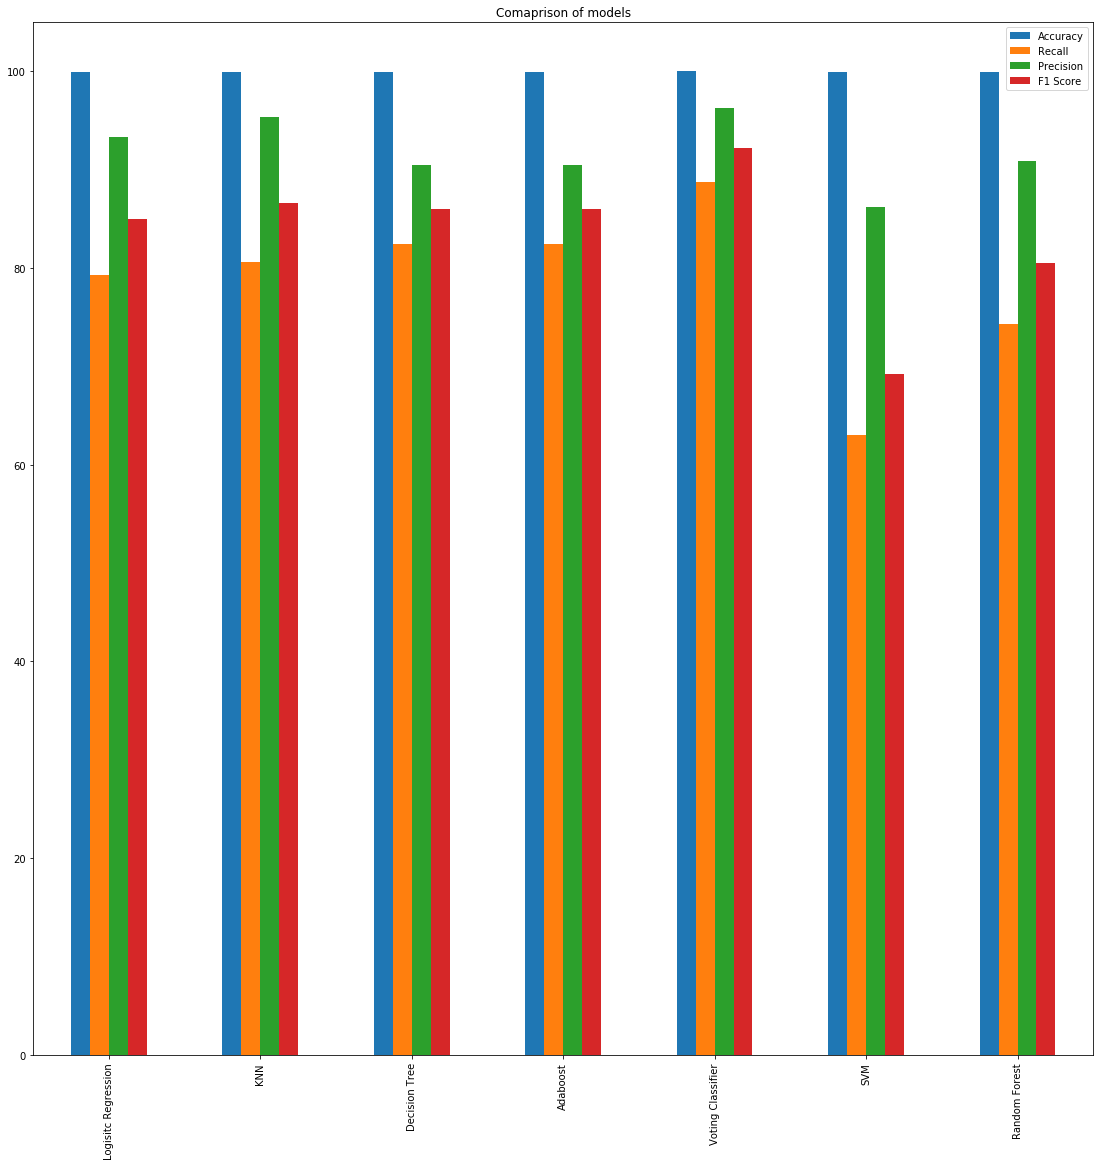

In [47]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002374BF878C8>,
      dtype=object)

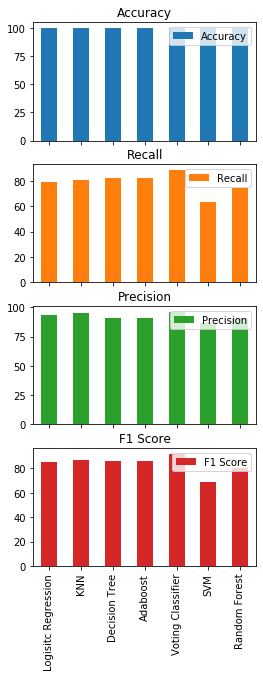

In [48]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

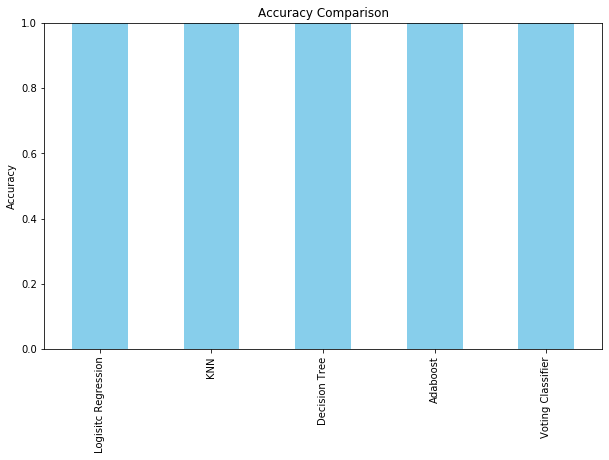

In [49]:
results_df = pd.DataFrame(results, index=['Logisitc Regression','KNN','Decision Tree','Adaboost','Voting Classifier'])

# Plotting Accuracy
plt.figure(figsize=(10, 6))
results_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

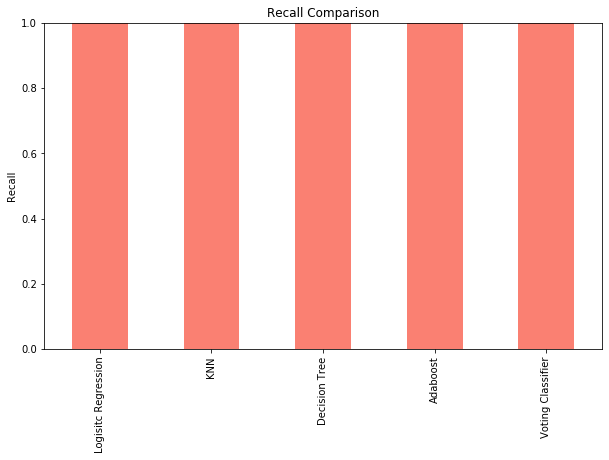

In [50]:
plt.figure(figsize=(10, 6))
results_df['Recall'].plot(kind='bar', color='salmon')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()

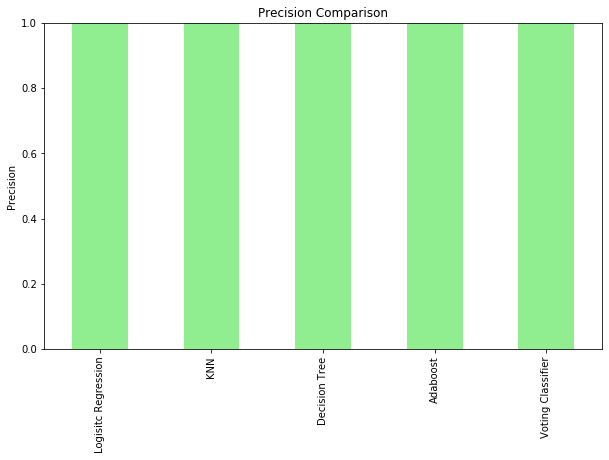

In [51]:
plt.figure(figsize=(10, 6))
results_df['Precision'].plot(kind='bar', color='lightgreen')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()

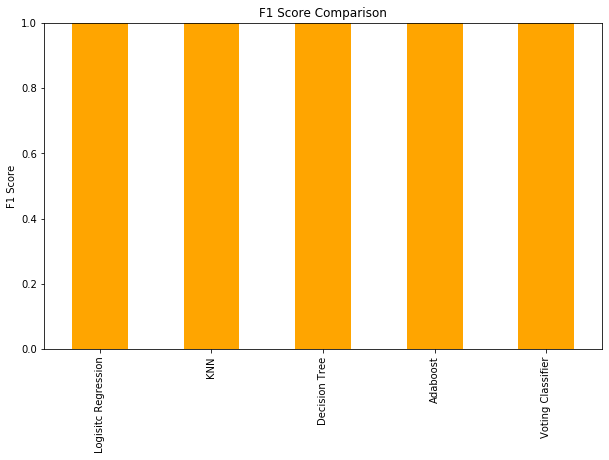

In [52]:
plt.figure(figsize=(10, 6))
results_df['F1 Score'].plot(kind='bar', color='orange')
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

# Saving Model

In [53]:
joblib.dump(voting_classifier, 'model.sav')

['model.sav']